## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plot Generators
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading in the sales data
sales_df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
sales_df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


# 1. What are the total sales for each payment method?

In [17]:
payment_df = sales_df.groupby(['payment']).size().reset_index().rename(columns={0:"num_sales"})
total_sum = payment_df['num_sales'].sum()
payment_df['percentage_sales'] = payment_df['num_sales'] / total_sum
payment_df


,payment,num_sales,percentage_sales
0,Cash,116,0.116
1,Credit card,659,0.659
2,Transfer,225,0.225


In [106]:
client_type_sales_df = sales_df.groupby(['client_type','payment']).size().reset_index().rename(columns={0:"num_sales"})
total_sum = client_type_sales_df['num_sales'].sum()
client_type_sales_df['percentage_sales'] = client_type_sales_df['num_sales'] / total_sum
client_type_sales_df


,client_type,payment,num_sales,percentage_sales
0,Retail,Cash,116,0.116
1,Retail,Credit card,659,0.659
2,Wholesale,Transfer,225,0.225


In [128]:
warehouse_payment_df = sales_df.groupby(['warehouse','payment']).size().reset_index().rename(columns={0:"num_sales"})

warehouse_payment_df['percentage_payment_sales'] = 0

for payment_type in warehouse_payment_df['payment'].unique():
    indicator = (warehouse_payment_df['payment'] == payment_type)

    warehouse_payment_df.loc[indicator,'percentage_payment_sales'] = warehouse_payment_df[indicator]["num_sales"]/warehouse_payment_df[indicator]["num_sales"].sum()

warehouse_payment_df.sort_values(by="payment")

,warehouse,payment,num_sales,percentage_payment_sales
0,Central,Cash,49,0.422414
3,North,Cash,43,0.370690
6,West,Cash,24,0.206897
1,Central,Credit card,322,0.488619
4,North,Credit card,220,0.333839
7,West,Credit card,117,0.177542
2,Central,Transfer,109,0.484444
5,North,Transfer,77,0.342222
8,West,Transfer,39,0.173333


* There are 1000 transactions with Credit card payments accounting for 65.9% of all transactions, Transfer payments accounting for 22.5%, and Cash payments accounting for 11.6%. 
* Retail clients account for all credit card and cash payments while Wholesale clients account for all transfer payments.


* Central Warehouse account for 42% of all cash payments, North Warehouse accounts for 37% , and West Warehouse accounts for 21%.

* Central Warehouse account for 49% of all credit card payments, North Warehouse accounts for 33% , and West Warehouse accounts for 18%.

* Central Warehouse account for 48% of all transfer payments, North Warehouse accounts for 34% , and West Warehouse accounts for 17%.

# 2. What is the average unit price for each product line?

In [135]:
product_line_df = sales_df.groupby(['product_line'])['unit_price'].mean().reset_index()
product_line_df


,product_line,unit_price
0,Breaking system,17.740522
1,Electrical system,25.585130
2,Engine,60.091803
3,Frame & body,42.832229
4,Miscellaneous,22.810738
5,Suspension & traction,33.969868


In [144]:
product_line_df = sales_df.groupby(['product_line','warehouse'])['unit_price'].mean().sort_values() .reset_index().sort_values(by="product_line")
product_line_df

,product_line,warehouse,unit_price
0,Breaking system,North,17.462394
1,Breaking system,Central,17.499107
2,Breaking system,West,18.735957
7,Electrical system,North,25.525758
6,Electrical system,West,25.344722
8,Electrical system,Central,25.723297
16,Engine,Central,60.058889
15,Engine,North,59.125625
17,Engine,West,61.941111
12,Frame & body,North,42.602373


# Insights

The average cost for Breaking system is $17.74, with North warehouse having the cheapest unit price of $17.46 and West warehouse having the highest unit price of $18.74 .

The average cost for Electrical system is $25.59, with West warehouse having the cheapest unit price of $25.34 and Central warehouse having the highest unit price of $25.72 .

The average cost for Engine is is $60.09, with North warehouse having the cheapest unit price of $59.13 and West warehouse having the highest unit price of $61.94 .

The average cost for Frame & body is $42.83, with North warehouse having the cheapest unit price of $42.60 and West warehouse having the highest unit price of $43.55 .

The average cost for Miscellaneous is $22.81, with Central warehouse having the cheapest unit price of $22.73 and North warehouse having the highest unit price of $22.94 .

The average cost for Suspension & traction is $33.97, with Central warehouse having the cheapest unit price of $33.65 and West warehouse having the highest unit price of $34.80 .


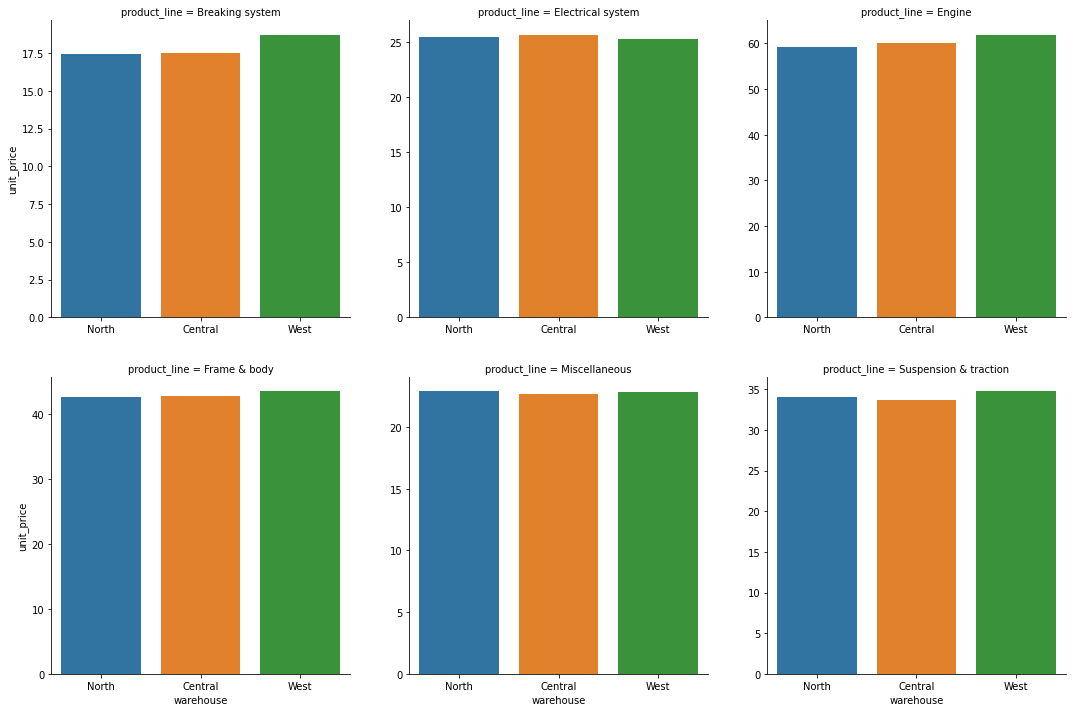

In [174]:
catplot = sns.catplot( x='warehouse' , y = 'unit_price', 
                        data = product_line_df, col = 'product_line', kind = 'bar',col_wrap= 3,
                        sharey = False)

for ax in catplot.axes.flatten():
    ax.tick_params(labelbottom=True)


plt.subplots_adjust(hspace = 0.2, wspace = 0.2)